In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
#To load the data
df=pd.read_csv("Housing.csv")

In [3]:
#To view the top 5 data 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#To view the shape of the data
df.shape

(545, 13)

In [5]:
#To view the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#To view the describtive summary of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#To view the summary of the catagorical data in the data
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [8]:
#To view the no of duplicates
df.duplicated().sum()

0

In [9]:
#To view the null values in the data
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: >

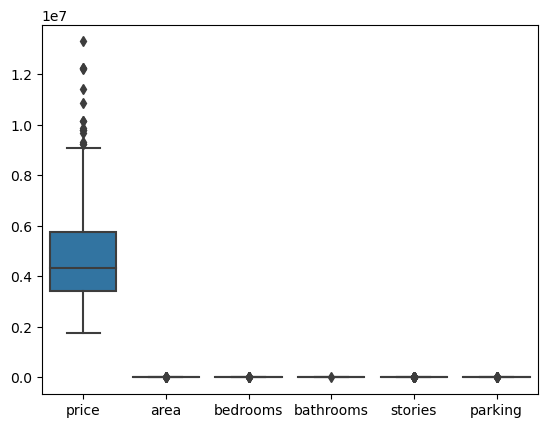

In [10]:
#To view the box plor for all numerical data
sns.boxplot(df)

<Axes: >

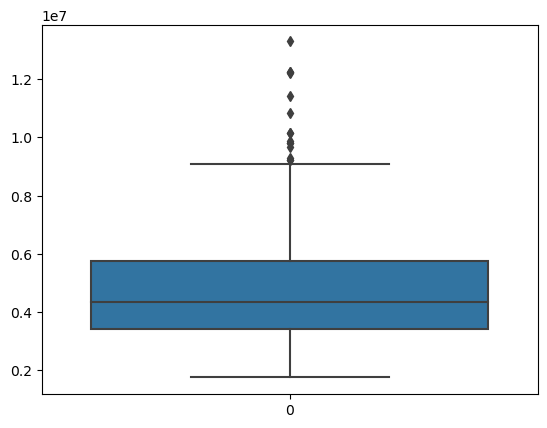

In [11]:
sns.boxplot(df["price"])

<Axes: >

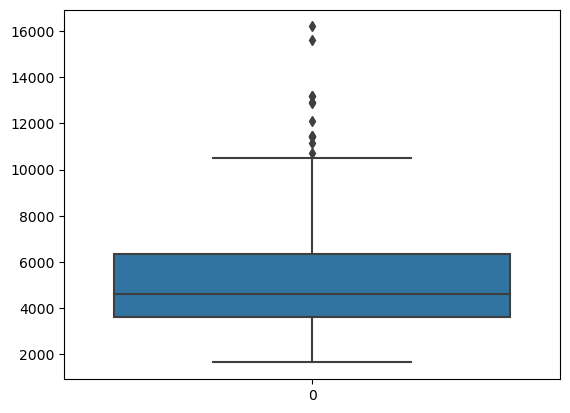

In [12]:
sns.boxplot(df["area"])

<Axes: >

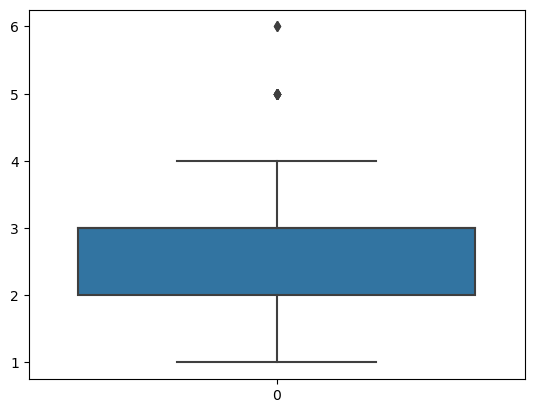

In [13]:
sns.boxplot(df["bedrooms"])

<Axes: >

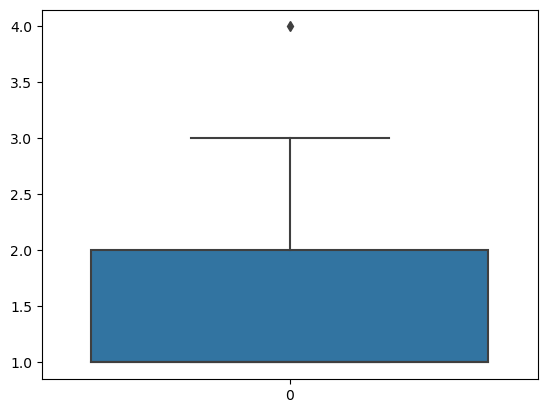

In [14]:
sns.boxplot(df["bathrooms"])

<Axes: >

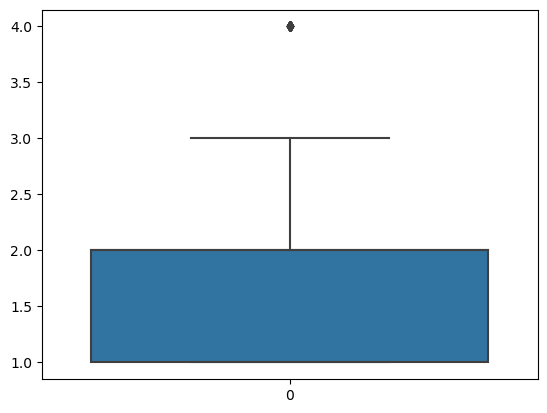

In [15]:
sns.boxplot(df["stories"])

<Axes: >

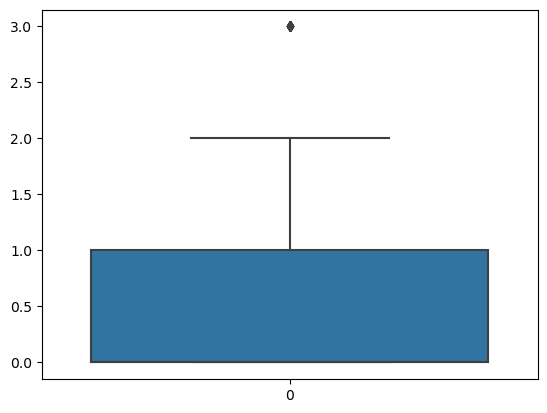

In [16]:
sns.boxplot(df["parking"])

In [17]:
#use of log transformation to reduce outliers
df["area"]=np.log1p(df["area"])
df["price"]=np.log1p(df["price"])
df["bedrooms"]=np.log1p(df["bedrooms"])
df["bathrooms"]=np.log1p(df["bathrooms"])
df["stories"]=np.log1p(df["stories"])
df["parking"]=np.log1p(df["parking"])

<Axes: >

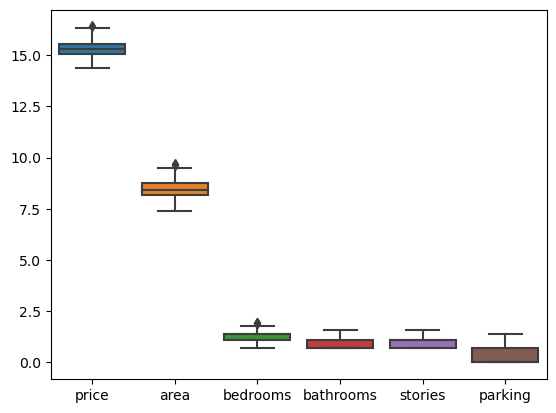

In [18]:
sns.boxplot(df)

<Axes: >

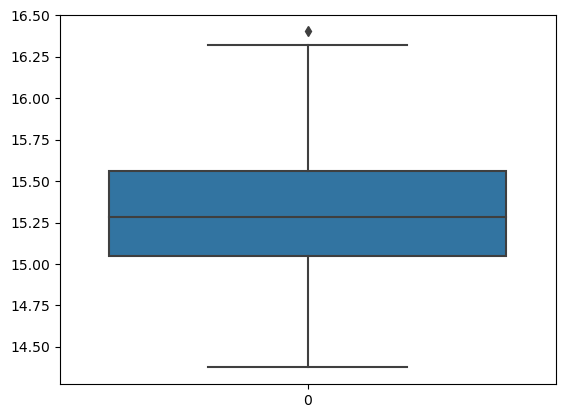

In [19]:
sns.boxplot(df["price"])

<Axes: >

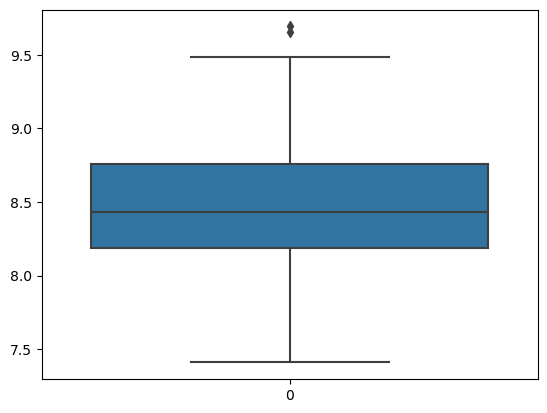

In [20]:
sns.boxplot(df["area"])

<Axes: >

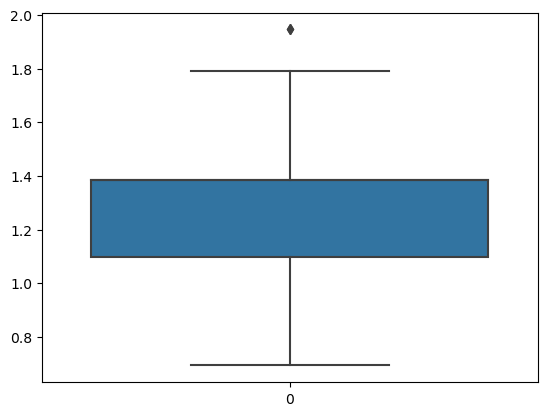

In [21]:
sns.boxplot(df["bedrooms"])

<Axes: >

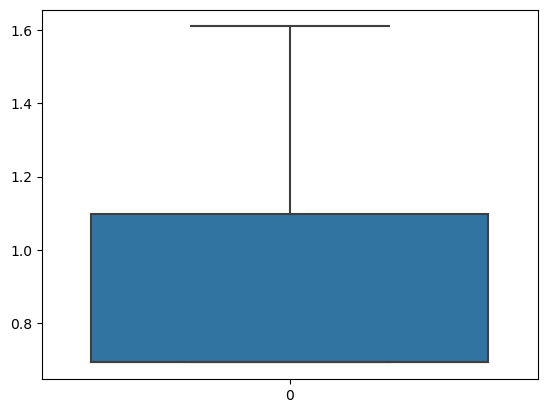

In [22]:
sns.boxplot(df["bathrooms"])

<Axes: >

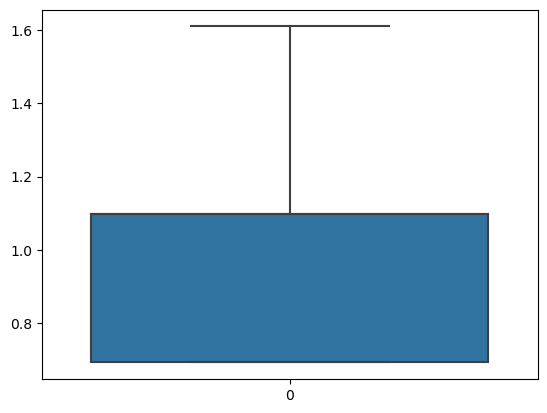

In [23]:
sns.boxplot(df["stories"])

<Axes: >

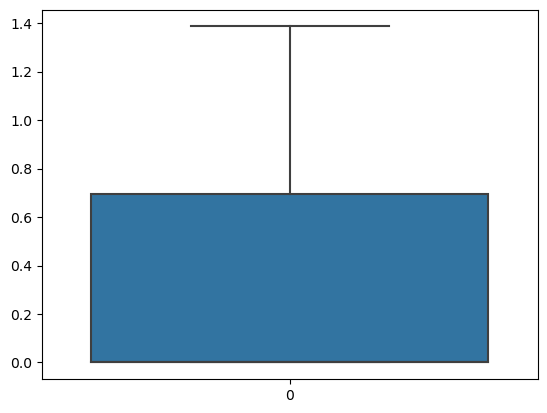

In [24]:
sns.boxplot(df["parking"])

In [25]:
#Use of IQR method to remove outliers
for col in ['area','bedrooms','price']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    df[col] = df[col][~((df[col]< (q1 - 1.5 * iqr)) |(df[col] > (q3 + 1.5 * iqr)))]

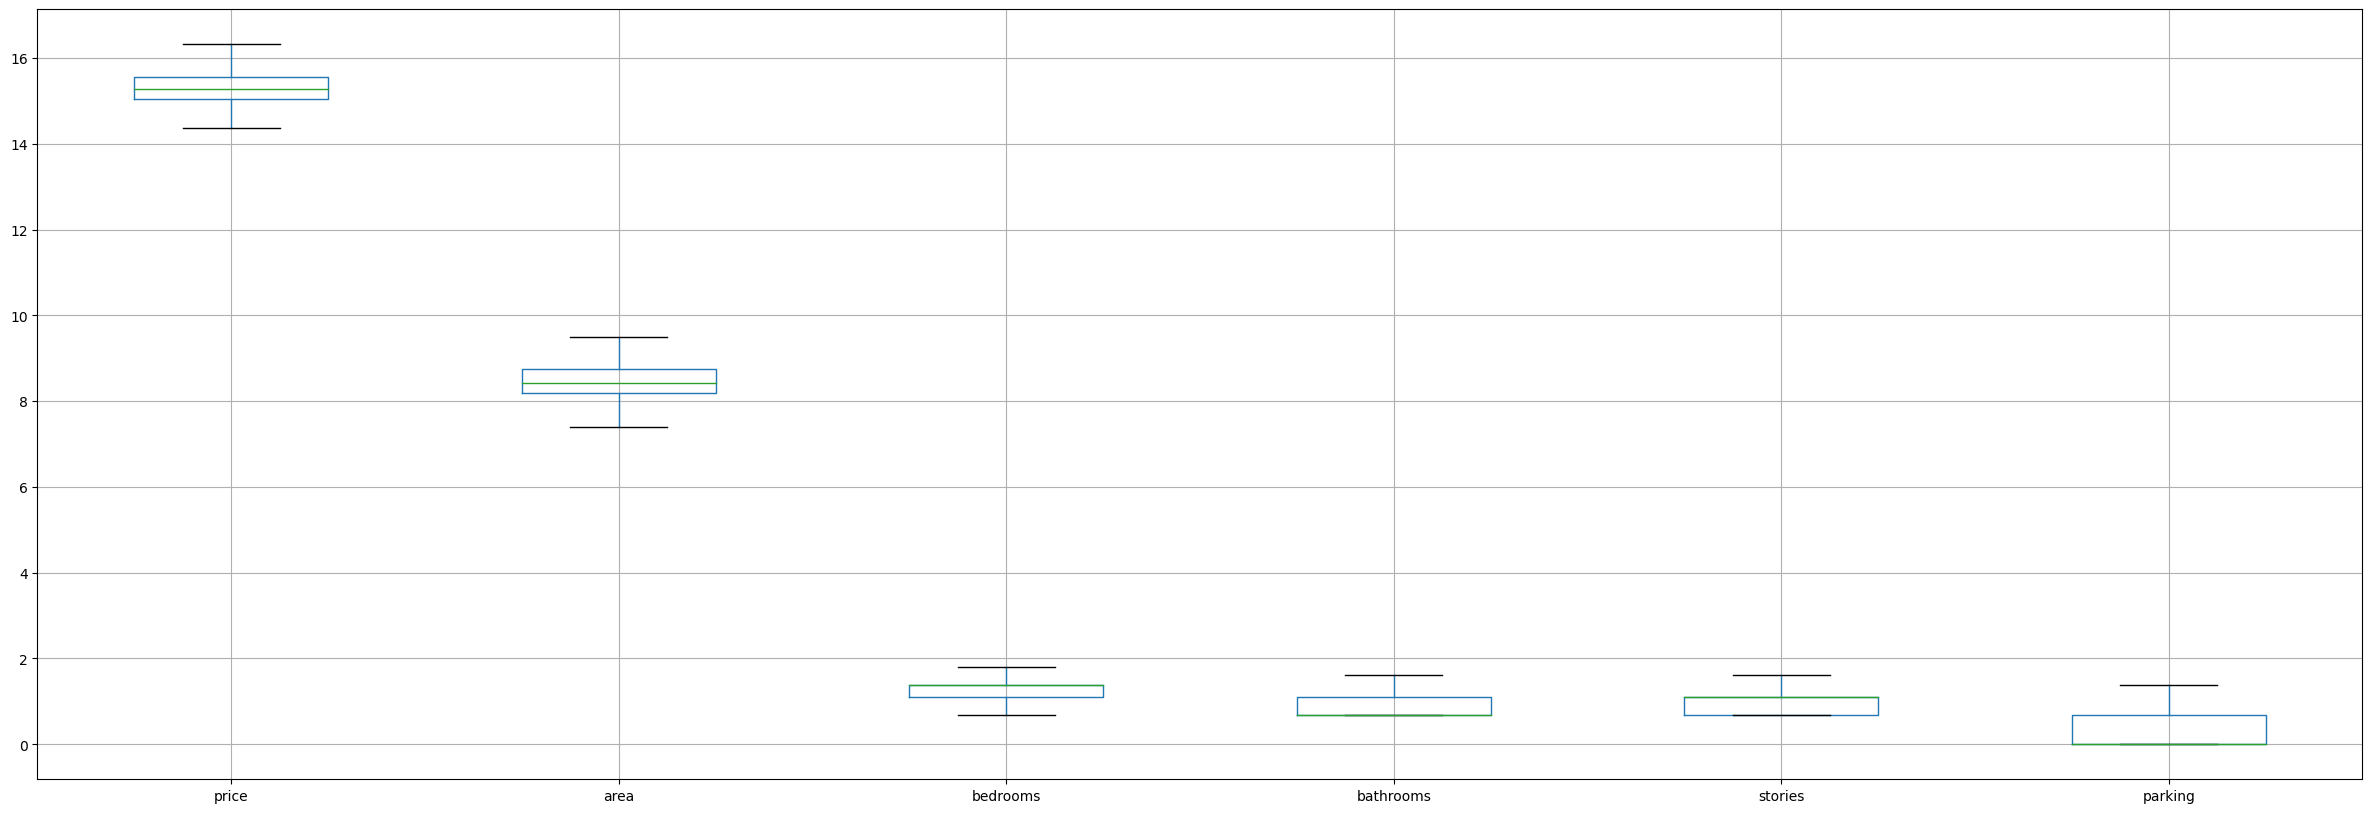

In [26]:
#Overall box plot for the data to view the outliers
df.boxplot(figsize=(30,10))
plt.show()

The overall boxplot represnts the data after removing the outliers

<Axes: xlabel='price', ylabel='Count'>

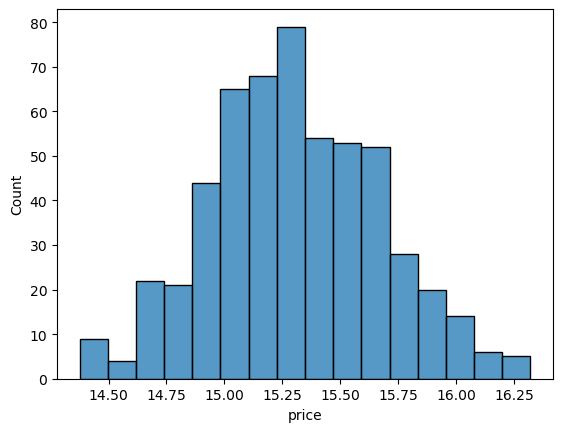

In [27]:
#To plot histogram for price to view the distribution of data
sns.histplot(df["price"])

In [28]:
#To view the a average of price
df["price"].mean()

15.30497188647159

In [29]:
#To view the a median of price(middle value)
df["price"].median()

15.283385136491308

In [30]:
#To view the mode of price(most repeated value)
df["price"].mode()

0    15.068274
1    15.250595
Name: price, dtype: float64

In [31]:
#To view the a Range of price
df_range=df["price"].max()-df["price"].min()
df_range

1.945909659259554

In [32]:
#To view the variance of price
df["price"].var()

0.13654451455855823

In [33]:
#To view the standard deviance of price
df["price"].std()

0.36951930201081273

In [34]:
#To view the skewness of price
df["price"].skew()

0.1123295431312065

In [35]:
#To view the kurtosis of price
df["price"].kurt()

-0.1905268173031458

In [36]:
#To view the correlation matrix
df_corr=df.corr(numeric_only=True)
df_corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.575020,0.390178,0.486488,0.391516,0.376843
area,0.575020,1.000000,0.154339,0.193633,0.075758,0.366747
bedrooms,0.390178,0.154339,1.000000,0.372775,0.475315,0.148297
bathrooms,0.486488,0.193633,0.372775,1.000000,0.323327,0.178392
stories,0.391516,0.075758,0.475315,0.323327,1.000000,0.035148
parking,0.376843,0.366747,0.148297,0.178392,0.035148,1.000000


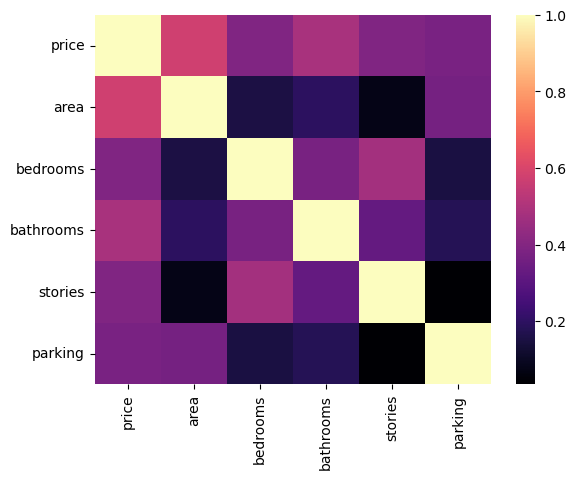

In [37]:
#To view the correlation graphically using heatmap
sns.heatmap(df_corr,cmap="magma")
plt.show()

We can also see the relationship between and other numerical columns using scatter plot

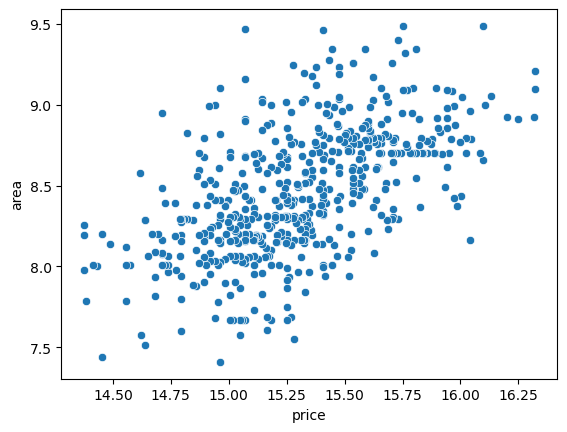

In [38]:
sns.scatterplot(data=df,x="price",y="area")
plt.show()

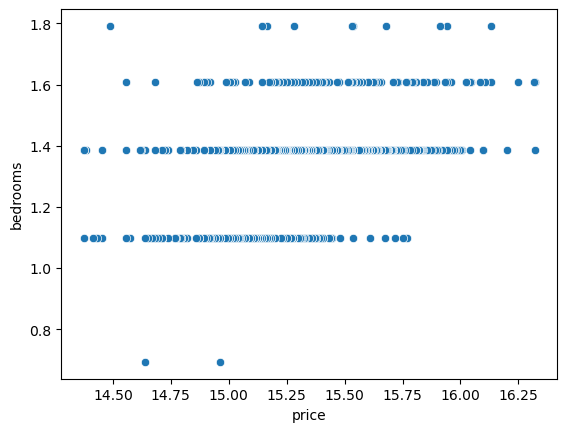

In [39]:
sns.scatterplot(data=df,x="price",y="bedrooms")
plt.show()

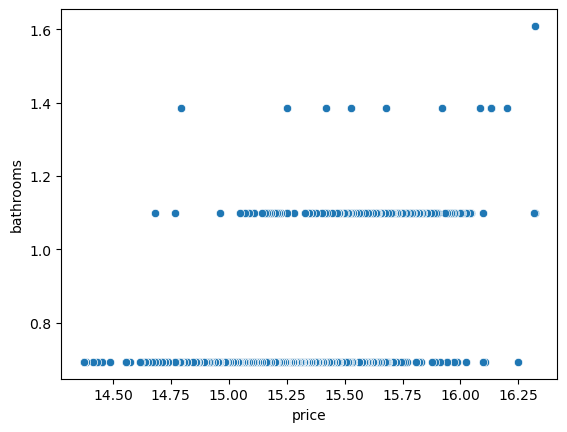

In [40]:
sns.scatterplot(data=df,x="price",y="bathrooms")
plt.show()

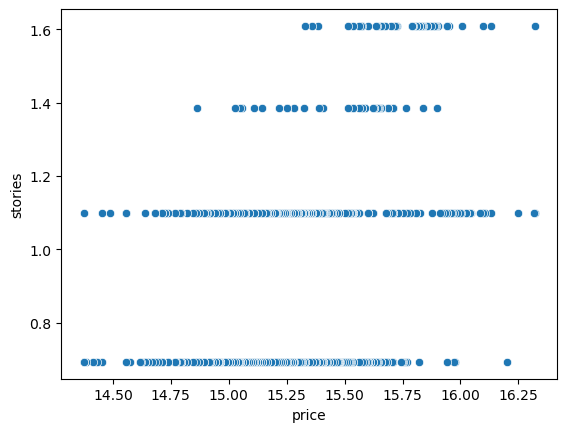

In [41]:
sns.scatterplot(data=df,x="price",y="stories")
plt.show()

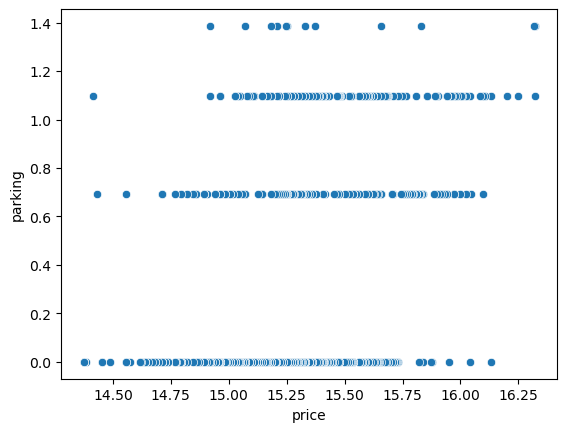

In [42]:
sns.scatterplot(data=df,x="price",y="parking")
plt.show()

Now we can see the total count of each column in the dataset

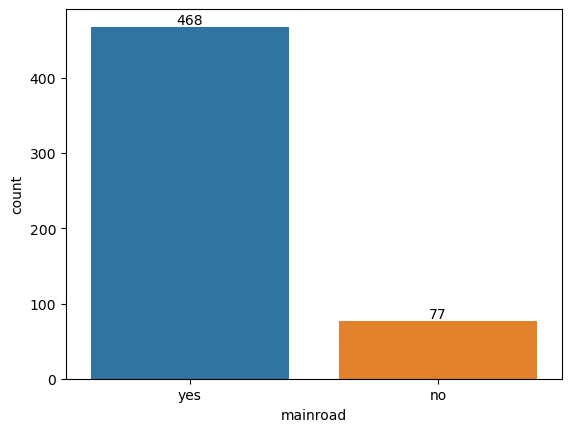

In [43]:
ax=sns.countplot(x="mainroad",data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

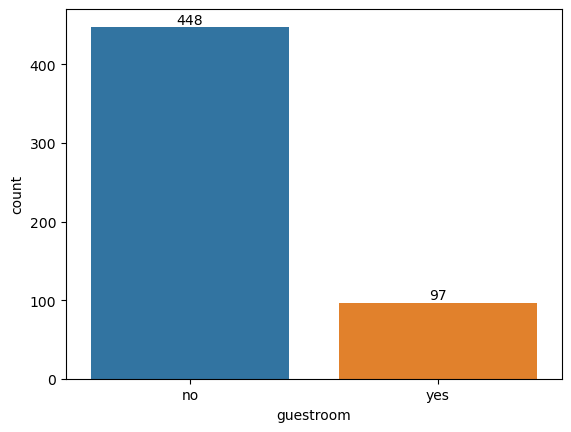

In [44]:
bx=sns.countplot(x="guestroom",data=df)
for i in bx.containers:
    bx.bar_label(i,)
plt.show()

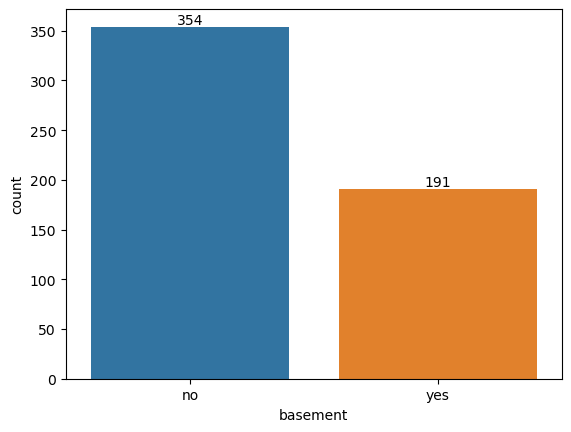

In [45]:
cx=sns.countplot(x="basement",data=df)
for i in cx.containers:
    cx.bar_label(i,)
plt.show()

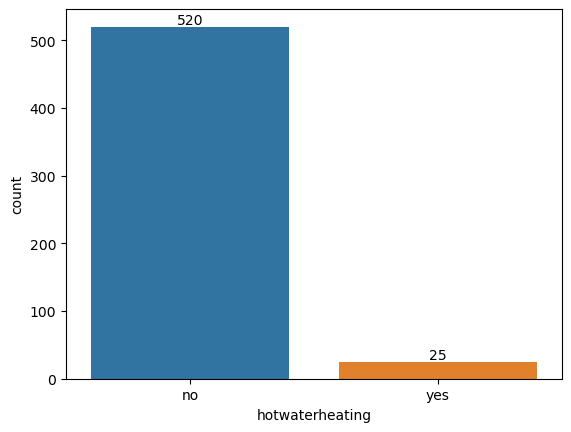

In [46]:
dx=sns.countplot(x="hotwaterheating",data=df)
for i in dx.containers:
    dx.bar_label(i,)
plt.show()

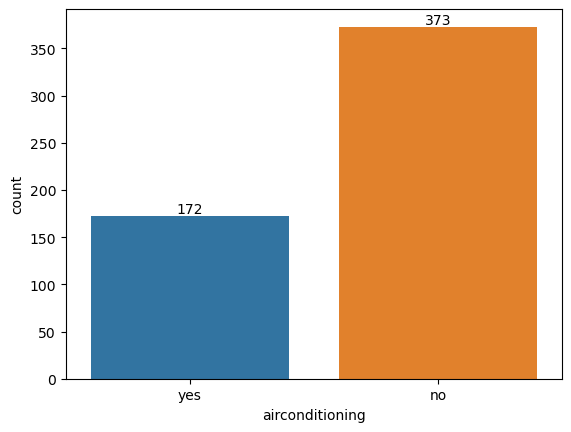

In [47]:
a=sns.countplot(x="airconditioning",data=df)
for i in a.containers:
    a.bar_label(i,)
plt.show()

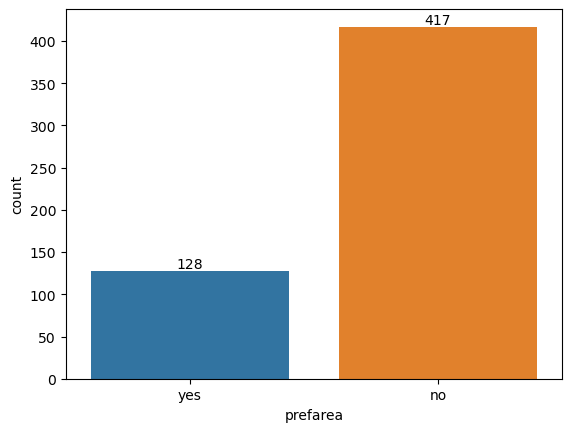

In [48]:
b=sns.countplot(x="prefarea",data=df)
for i in b.containers:
    b.bar_label(i,)
plt.show()

Now we are going to convert all catagorical into numerical for linear regression model

In [49]:
df.select_dtypes(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [50]:
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [51]:
df["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [52]:
df["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [53]:
df["basement"].unique()

array(['no', 'yes'], dtype=object)

In [54]:
df["hotwaterheating"].unique()

array(['no', 'yes'], dtype=object)

In [55]:
df["airconditioning"].unique()

array(['yes', 'no'], dtype=object)

In [56]:
df["prefarea"].unique()

array(['yes', 'no'], dtype=object)

In [57]:
df["mainroad"]=df["mainroad"].apply(lambda x:1 if x=="yes" else 0)

In [58]:
df["guestroom"]=df["guestroom"].apply(lambda x:1 if x=="yes" else 0)

In [59]:
df["basement"]=df["basement"].apply(lambda x:1 if x=="yes" else 0)

In [60]:
df["hotwaterheating"]=df["hotwaterheating"].apply(lambda x:1 if x=="yes" else 0)

In [61]:
df["airconditioning"]=df["airconditioning"].apply(lambda x:1 if x=="yes" else 0)

In [62]:
df["prefarea"]=df["prefarea"].apply(lambda x:1 if x=="yes" else 0)

In [63]:
df.select_dtypes(include=object)

,furnishingstatus
0,furnished
1,furnished
2,semi-furnished
3,furnished
4,furnished
...,...
540,unfurnished
541,semi-furnished
542,unfurnished
543,furnished


In [64]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()
df["furnishingstatus"]=le.fit_transform(df["furnishingstatus"])

In [67]:
df["furnishingstatus"].unique()

array([0, 1, 2])

In [68]:
#All catagorical columns are convertedz
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,NaN,8.912069,1.609438,1.098612,1.386294,1,0,0,0,1,1.098612,1,0
1,16.321037,9.100637,1.609438,1.609438,1.609438,1,0,0,0,1,1.386294,0,0
2,16.321037,9.206433,1.386294,1.098612,1.098612,1,0,1,0,0,1.098612,1,1
3,16.318175,8.922792,1.609438,1.098612,1.098612,1,0,1,0,1,1.386294,1,0
4,16.250001,8.912069,1.609438,0.693147,1.098612,1,1,1,0,1,1.098612,0,0


In [69]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,544.000000,543.000000,543.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,15.304972,8.462318,1.358195,0.806495,0.988746,0.858716,0.177982,0.350459,0.045872,0.315596,0.408481,0.234862,1.069725
std,0.369519,0.392105,0.183055,0.194159,0.286546,0.348635,0.382849,0.477552,0.209399,0.465180,0.475527,0.424302,0.761373
min,14.375127,7.409136,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.048071,8.186740,1.098612,0.693147,0.693147,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.283385,8.425297,1.386294,0.693147,1.098612,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.562970,8.757941,1.386294,1.098612,1.098612,1.000000,0.000000,1.000000,0.000000,1.000000,0.693147,0.000000,2.000000
max,16.321037,9.488048,1.791759,1.609438,1.609438,1.000000,1.000000,1.000000,1.000000,1.000000,1.386294,1.000000,2.000000


In [70]:
df.isnull().sum()*100/len(df)

price               0.183486
area                0.366972
bedrooms            0.366972
bathrooms           0.000000
stories             0.000000
mainroad            0.000000
guestroom           0.000000
basement            0.000000
hotwaterheating     0.000000
airconditioning     0.000000
parking             0.000000
prefarea            0.000000
furnishingstatus    0.000000
dtype: float64

In [71]:
df["price"]=df["price"].fillna(df["price"].mean())
df["area"]=df["area"].fillna(df["area"].mean())
df["bedrooms"]=df["bedrooms"].fillna(df["bedrooms"].median())

In [72]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [73]:
x=df.drop("price",axis=1)
y=df["price"]

In [74]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8.912069,1.609438,1.098612,1.386294,1,0,0,0,1,1.098612,1,0
1,9.100637,1.609438,1.609438,1.609438,1,0,0,0,1,1.386294,0,0
2,9.206433,1.386294,1.098612,1.098612,1,0,1,0,0,1.098612,1,1
3,8.922792,1.609438,1.098612,1.098612,1,0,1,0,1,1.386294,1,0
4,8.912069,1.609438,0.693147,1.098612,1,1,1,0,1,1.098612,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,8.006701,1.098612,0.693147,0.693147,1,0,1,0,0,1.098612,0,2
541,7.783641,1.386294,0.693147,0.693147,0,0,0,0,0,0.000000,0,1
542,8.194506,1.098612,0.693147,0.693147,1,0,0,0,0,0.000000,0,2
543,7.976252,1.386294,0.693147,0.693147,0,0,0,0,0,0.000000,0,0


In [75]:
y

0      15.304972
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 545, dtype: float64

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [77]:
ss=StandardScaler()
x_train =ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [78]:
li=LinearRegression()

In [79]:
li.fit(x_train,y_train)

LinearRegression()

In [80]:
print(f'Coefficient: {li.coef_}')

Coefficient: [ 0.11905492  0.01961029  0.09288832  0.06159599  0.0324068   0.01879693
  0.05189308  0.02416029  0.05989511  0.03937873  0.04469297 -0.0421291 ]


In [81]:
print(f'Intercept: {li.intercept_}')

Intercept: 15.313419702963243


In [82]:
li.score(x_train, y_train)

0.7036664676914599

In [83]:
li.score(x_test, y_test)

0.6355663169939568

In [84]:
y_pred_train = li.predict(x_train)

In [85]:
y_pred_test = li.predict(x_test)